In [1]:
from cv2 import cv2
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

(3024, 4032, 3)


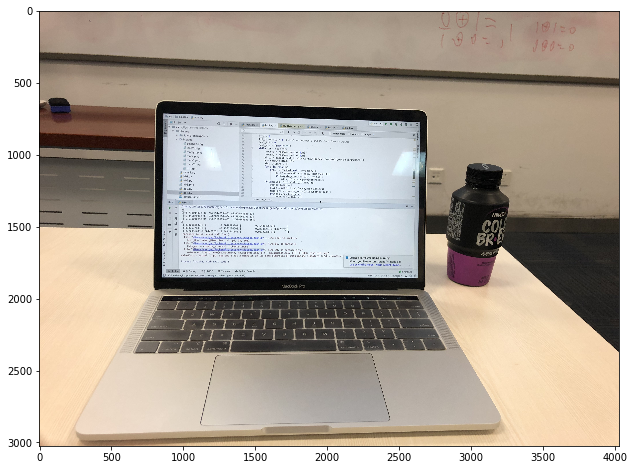

In [2]:
path1 = "/Users/carlguo/Desktop/IMG_5350.jpg"
path2 = "/Users/carlguo/Desktop/IMG_5351.jpg"

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,8))
plt.imshow(img1)
print(img1.shape)

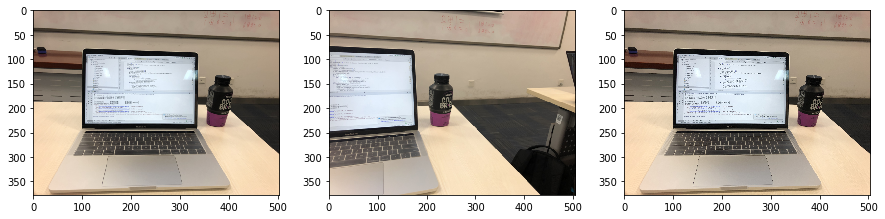

In [3]:
img1_small = cv2.resize(img1,(0,0), fx=0.125, fy=0.125,interpolation=cv2.INTER_AREA)
img1_nn = cv2.resize(img1,(0,0), fx=0.125, fy=0.125,interpolation=cv2.INTER_LINEAR)
img2_small = cv2.resize(img2,(0,0), fx=0.125, fy=0.125,interpolation=cv2.INTER_AREA)


plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img1_small)
plt.subplot(1,3,2)
plt.imshow(img2_small)
plt.subplot(1,3,3)
plt.imshow(img1_nn)
plt.show()

In [4]:
MAX_FEATURE = 300
orb = cv2.ORB_create(MAX_FEATURE)

keypoint1, descriptor1 = orb.detectAndCompute(img1_small, None)
keypoint2, descriptor2 = orb.detectAndCompute(img2_small, None)
print('descriptor shape:',descriptor1[0],descriptor1.shape)



descriptor shape: [141 101 113   2 215 251 229  81 127 244  61  26  72  80 215 189  59 168
 194 187 176 118  60  94 124   8  69 110 247 117  71 228] (300, 32)


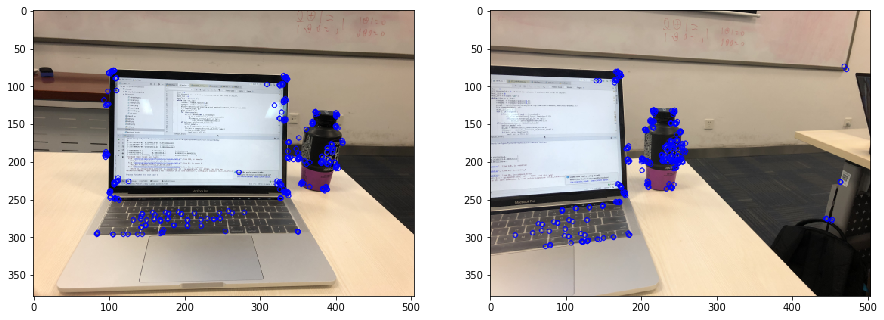

In [5]:
img_vis1 = cv2.drawKeypoints(img1_small,keypoint1,img1_small,
                  (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
img_vis2 = cv2.drawKeypoints(img2_small,keypoint2,img2_small,
                  (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img_vis1)

plt.subplot(1,2,2)
plt.imshow(img_vis2)
plt.show()

In [6]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_L1)
matches = matcher.match(descriptor1,descriptor2,None)
print(matches[0].queryIdx,matches[0].trainIdx,matches[0].distance)

0 158 1891.0


In [7]:
matches.sort(key=lambda x : x.distance,reverse= False)
print(matches[0].queryIdx,matches[0].trainIdx,matches[0].distance)

181 176 327.0


Number of good matches: 30


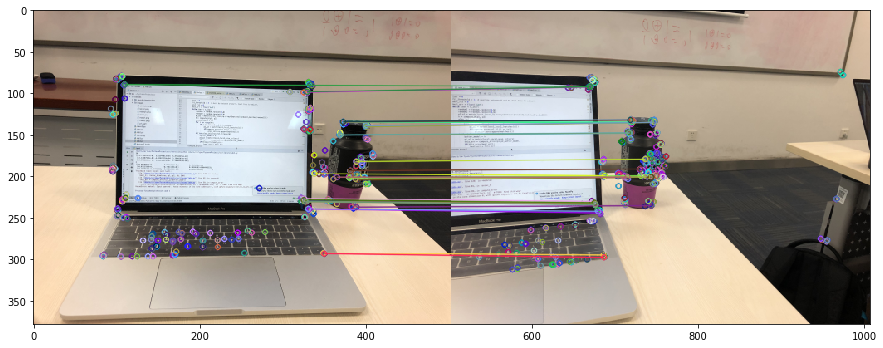

In [8]:
GOOD_MATCH_PERCENT = 0.1
num_good_match = int(len(matches) * GOOD_MATCH_PERCENT)
good_matches = matches[:num_good_match]
print("Number of good matches: %d"%len(good_matches))
im_match=cv2.drawMatches(img1_small,keypoint1,img2_small,keypoint2,good_matches,None)
plt.figure(figsize=(15,8))
plt.imshow(im_match)
plt.show()

In [9]:
points1 = np.zeros((len(good_matches),2),dtype=np.float32)
points2 = np.zeros((len(good_matches),2),dtype=np.float32)
for i,match in enumerate(good_matches): 
    points1[i,:] = keypoint1[match.queryIdx].pt
    points2[i,:] = keypoint2[match.trainIdx].pt
print(points1)


[[400.89603  139.96802 ]
 [369.       150.      ]
 [373.24805  134.78401 ]
 [332.64     239.04001 ]
 [326.88     228.96    ]
 [326.59204  229.82402 ]
 [390.56683  204.24136 ]
 [380.40002  201.6     ]
 [349.05603  292.032   ]
 [330.04803   98.49601 ]
 [325.97     226.43718 ]
 [338.4116   196.57733 ]
 [388.       203.      ]
 [325.55524  228.09604 ]
 [330.94662  238.87878 ]
 [382.       193.      ]
 [372.96002  133.92    ]
 [373.2      134.40001 ]
 [388.80005  236.73602 ]
 [373.24808  134.36931 ]
 [369.6      150.      ]
 [389.       182.      ]
 [327.6      230.40001 ]
 [109.90082   89.16481 ]
 [329.76      97.920006]
 [365.48456  200.65819 ]
 [350.40002  292.80002 ]
 [328.       230.      ]
 [400.20486  138.93121 ]
 [373.       134.      ]]


In [10]:
H, mask= cv2.findHomography(points2,points1,cv2.RANSAC,maxIters= 30)

print(H)


[[ 5.32653529e-01 -1.01069867e-01  2.05993307e+02]
 [-7.82758759e-02  7.65597092e-01  2.73709991e+01]
 [-7.09988233e-04 -1.67588160e-04  1.00000000e+00]]


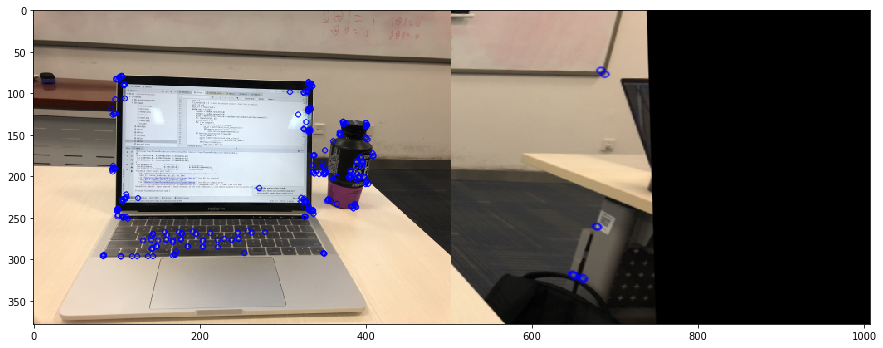

In [12]:
height, width = img2_small.shape[:2]

img1warp = cv2.warpPerspective(img2_small,H, (width*2,height))
img1warp[:,:width] = img1_small
plt.figure(figsize=(15,8))
#plt.subplot(1,2,1)
plt.imshow(img1warp)
#plt.subplot(1,2,2)
#plt.imshow(img1_small)
plt.show()

